In [1]:
import sqlite3, pandas as pd, numpy as np, nltk, string, matplotlib.pyplot as plt, seaborn as sns
import string, math, pickle
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from xgboost.sklearn import XGBModel, XGBRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import datasets

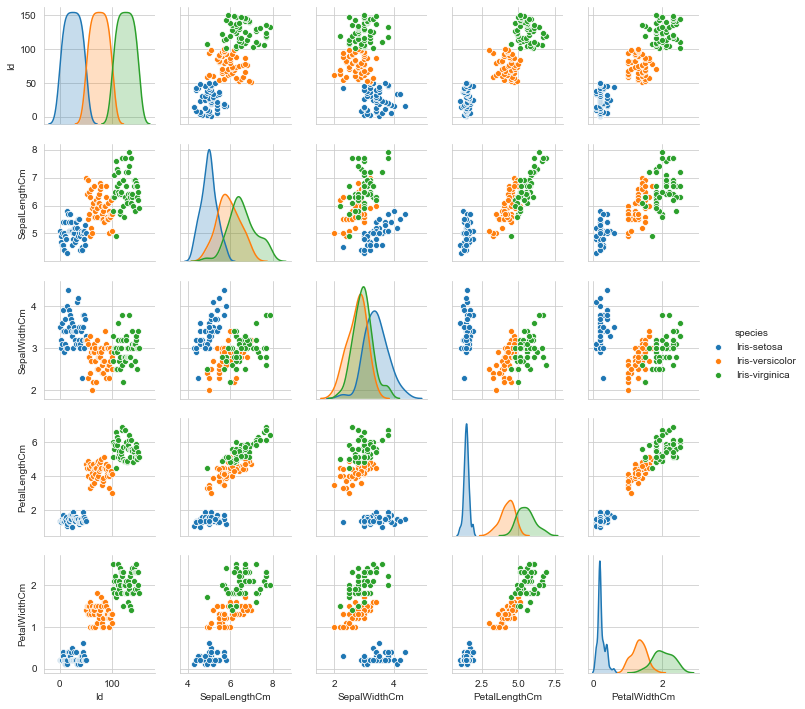

In [7]:
iris_dataset = pd.read_csv("iris.csv")
X, y = iris_dataset.iloc[:,0:4], iris_dataset.iloc[:,4]
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris_dataset, hue="species", size=2);
plt.show()

### Bagging.

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder_object = LabelEncoder()
y = encoder_object.fit_transform(y)

iris_dataset = pd.read_csv("iris.csv")
X, y = iris_dataset.iloc[:,0:4], iris_dataset.iloc[:,4]

from sklearn.preprocessing import LabelEncoder
encoder_object = LabelEncoder()
y = encoder_object.fit_transform(y)

RANDOM_SEED = 0

#Base Learners
rf_clf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEED)
zknn_clf = KNeighborsClassifier(n_neighbors=2)
svc_clf = SVC(C=10000.0, kernel='rbf', random_state=RANDOM_SEED)
rg_clf = RidgeClassifier(alpha=0.1, random_state=RANDOM_SEED)
lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED)
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=RANDOM_SEED)
adab_clf = AdaBoostClassifier(n_estimators=5,learning_rate=0.001)

classifier_array = [rf_clf, et_clf, knn_clf, svc_clf, rg_clf, lr_clf, dt_clf, adab_clf]
labels = [clf.__class__.__name__ for clf in classifier_array]

normal_accuracy = []
normal_std = []

bagging_accuracy = []
bagging_std = []

for clf in classifier_array:
    cv_scores = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=3, random_state=RANDOM_SEED)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=3, n_jobs=-1)
    
    normal_accuracy.append(np.round(cv_scores.mean(),4))
    normal_std.append(np.round(cv_scores.std(),4))
    
    bagging_accuracy.append(np.round(bagging_scores.mean(),4))
    bagging_std.append(np.round(bagging_scores.std(),4))
    
    print("Accuracy: %0.4f (+/- %0.4f) [Normal %s]" % (cv_scores.mean(), cv_scores.std(), clf.__class__.__name__))
    print("Accuracy: %0.4f (+/- %0.4f) [Bagging %s]\n" % (bagging_scores.mean(), bagging_scores.std(), clf.__class__.__name__))

Accuracy: 0.2533 (+/- 0.0340) [Normal RandomForestClassifier]
Accuracy: 0.3533 (+/- 0.0660) [Bagging RandomForestClassifier]

Accuracy: 0.2533 (+/- 0.0249) [Normal ExtraTreesClassifier]
Accuracy: 0.3400 (+/- 0.0566) [Bagging ExtraTreesClassifier]

Accuracy: 0.1733 (+/- 0.0525) [Normal KNeighborsClassifier]
Accuracy: 0.2533 (+/- 0.0340) [Bagging KNeighborsClassifier]

Accuracy: 0.1267 (+/- 0.0189) [Normal SVC]
Accuracy: 0.1333 (+/- 0.0340) [Bagging SVC]

Accuracy: 0.3067 (+/- 0.0189) [Normal RidgeClassifier]
Accuracy: 0.2867 (+/- 0.0094) [Bagging RidgeClassifier]

Accuracy: 0.1800 (+/- 0.1131) [Normal LogisticRegression]
Accuracy: 0.2667 (+/- 0.0899) [Bagging LogisticRegression]

Accuracy: 0.2000 (+/- 0.0712) [Normal DecisionTreeClassifier]
Accuracy: 0.2667 (+/- 0.0094) [Bagging DecisionTreeClassifier]

Accuracy: 0.2200 (+/- 0.0589) [Normal AdaBoostClassifier]
Accuracy: 0.2733 (+/- 0.0189) [Bagging AdaBoostClassifier]



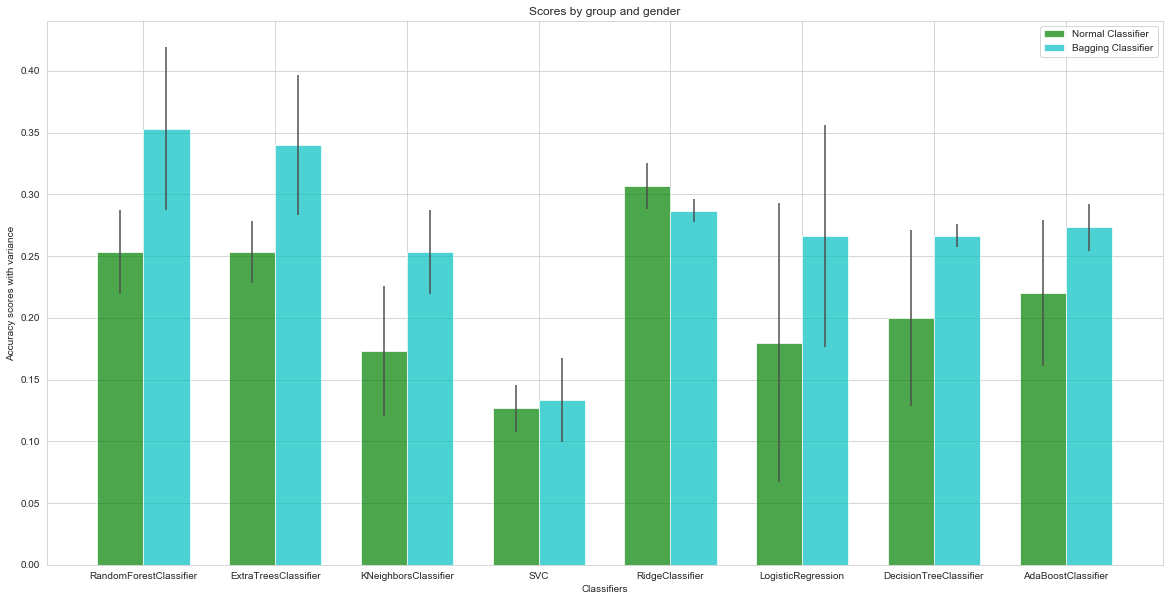

In [12]:
### Bagging.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(20,10))
n_groups = 8
index = np.arange(n_groups)
bar_width = 0.35

opacity = .7
error_config = {'ecolor': '0.3'}

normal_clf = ax.bar(index, normal_accuracy, bar_width, alpha=opacity, color='g', yerr=normal_std, error_kw=error_config, label='Normal Classifier')
bagging_clf = ax.bar(index + bar_width, bagging_accuracy, bar_width, alpha=opacity, color='c', yerr=bagging_std, error_kw=error_config, label='Bagging Classifier')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy scores with variance')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels((labels))
ax.legend()

#fig.tight_layout()

plt.show()

### Impact of change in bagging accuracies with an increase in the sub-sampling ratio.


In [6]:
### Display the accuracy of different bagging classifiers at various sub sampling ratio in a Pretty table.

subsampling_ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

various_bagging_scores = []

for clf in classifier_array:
    cv_scores = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
    #print("\nAccuracy: %0.4f (+/- %0.4f) [Normal %s]" % (cv_scores.mean(), cv_scores.std(), clf.__class__.__name__))
    
    mean_bagging_score = []
    for ratio in subsampling_ratio:
        bagging_clf = BaggingClassifier(clf, max_samples=ratio, max_features=3, random_state=RANDOM_SEED)
        bagging_scores = cross_val_score(bagging_clf, X, y, cv=3, n_jobs=-1)
        mean_bagging_score.append(bagging_scores.mean())
        #print("Bagging accuracy: %0.4f [max_samples %0.2f]" % (bagging_scores.mean(), ratio))
    various_bagging_scores.append(mean_bagging_score)

various_bagging_scores.insert(0,subsampling_ratio)
    
#Compare performance and display it in a pretty table.
from prettytable import PrettyTable
table = PrettyTable()
labels.insert(0,"Max Samples")
#table.field_names = label_models

index=0

for value in various_bagging_scores:
    table.add_column(labels[index],value)
    index += 1
print(table)

+-------------+------------------------+----------------------+----------------------+--------------------+--------------------+--------------------+------------------------+--------------------+
| Max Samples | RandomForestClassifier | ExtraTreesClassifier | KNeighborsClassifier |        SVC         |  RidgeClassifier   | LogisticRegression | DecisionTreeClassifier | AdaBoostClassifier |
+-------------+------------------------+----------------------+----------------------+--------------------+--------------------+--------------------+------------------------+--------------------+
|     0.1     |   0.9011437908496732   |  0.9007352941176471  |  0.9272875816993466  | 0.9272875816993463 | 0.8080065359477123 | 0.9334150326797386 |   0.9538398692810457   | 0.9211601307189542 |
|     0.2     |   0.9473039215686274   |  0.9072712418300654  |  0.9738562091503268  | 0.9464869281045751 | 0.8075980392156863 | 0.9464869281045751 |   0.960375816993464    | 0.9468954248366014 |
|     0.3     |   0.

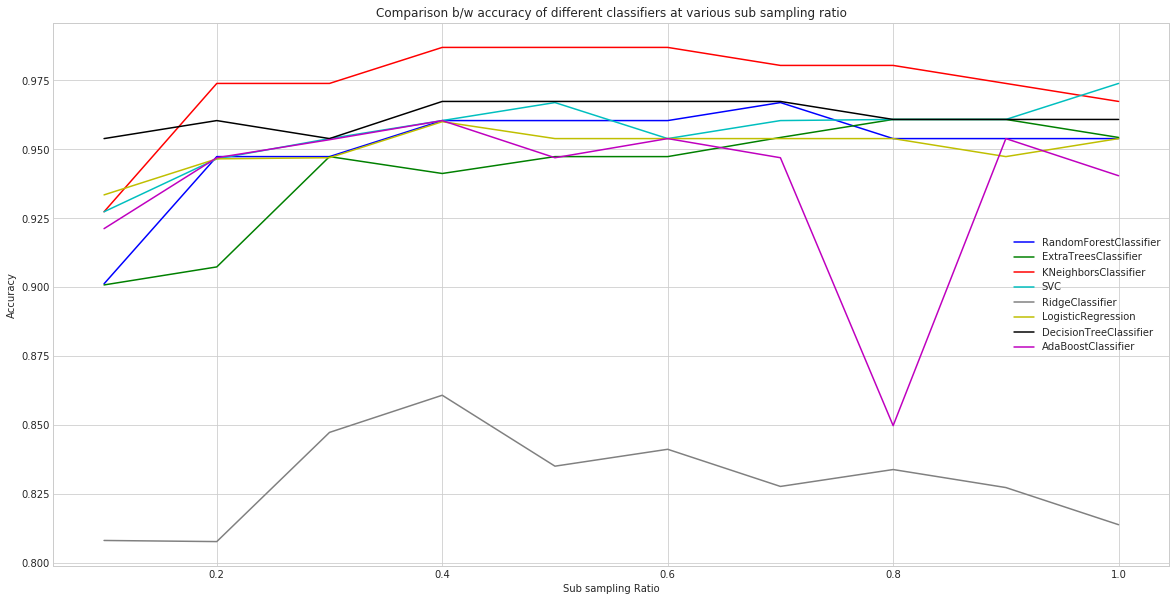

In [7]:
#Plot the bagging scores using a line chart.
labels.remove("Max Samples")
various_bagging_scores.remove(various_bagging_scores[0])

x_axes = subsampling_ratio

color_map = ['blue','g','r','c','grey','y','black','m']
plt.figure(figsize=(20,10))
for index in range(0,len(labels)):
    plt.plot(x_axes, various_bagging_scores[index], color=color_map[index], label=labels[index])
plt.xlabel('Sub sampling Ratio')
plt.ylabel('Accuracy')
plt.title("Comparison b/w accuracy of different classifiers at various sub sampling ratio")
plt.legend()
plt.show()

### Boosting:


In [8]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier

ada_boost = AdaBoostClassifier(n_estimators=5)
grad_boost = GradientBoostingClassifier(n_estimators=10)
xgb_boost = XGBClassifier(max_depth=5, learning_rate=0.001)

ensemble_clf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
boosting_labels = ['Ada Boost', 'Gradient Boost', 'XG Boost', 'Ensemble']

for clf, label in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels):
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: {0:.3f}, Variance: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Acuuracy: 0.967, Variance: (+/-) 0.018 [Ada Boost]
Acuuracy: 0.960, Variance: (+/-) 0.027 [Gradient Boost]
Acuuracy: 0.961, Variance: (+/-) 0.042 [XG Boost]
Acuuracy: 0.967, Variance: (+/-) 0.033 [Ensemble]


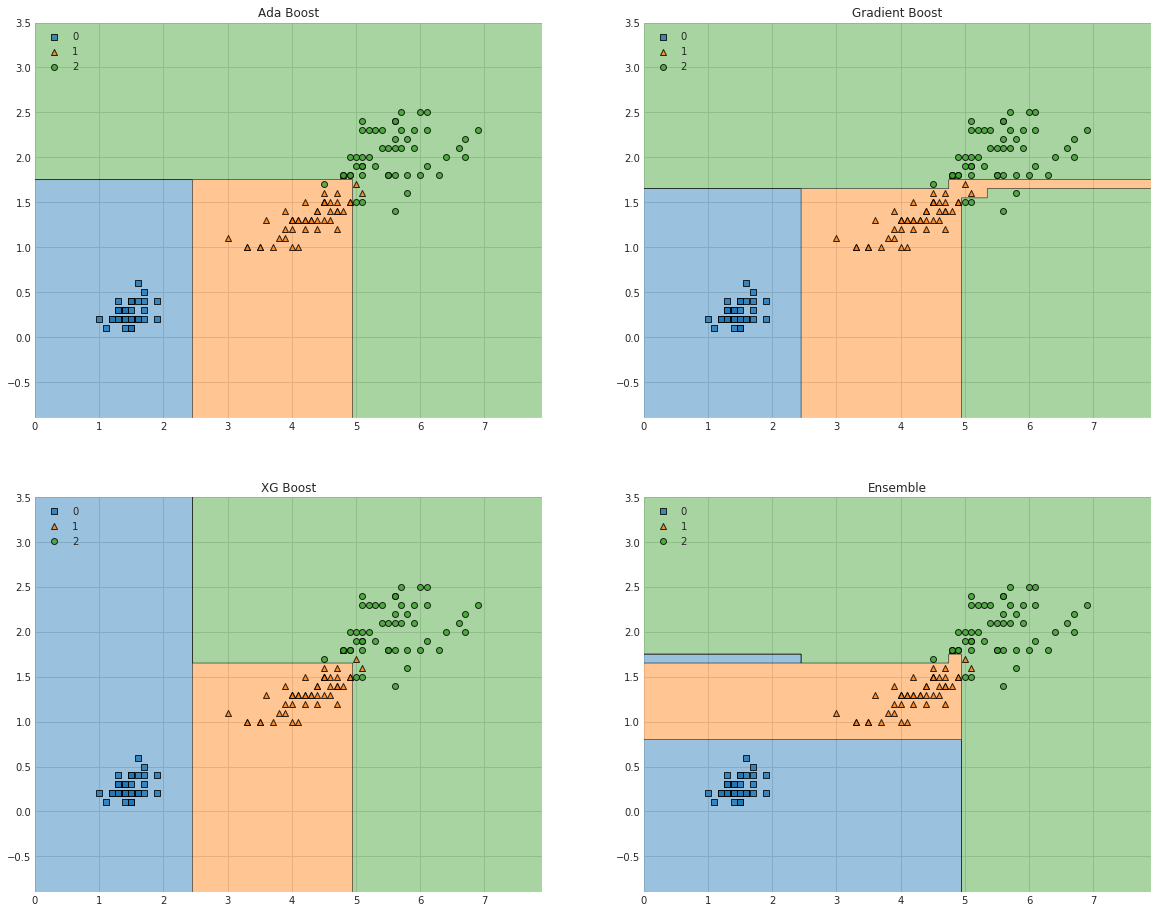

In [9]:
#Decision Regions for all the boosting algorithms.
X = np.array(iris_dataset[['petal_length','petal_width']])
y = np.array(y)

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,16))

for clf, label, grd in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)

plt.show()

### Stacking.

In [10]:
RANDOM_SEED = 0

X, y = iris_dataset.iloc[:,0:4], iris_dataset.iloc[:,4]

from sklearn.preprocessing import LabelEncoder
encoder_object = LabelEncoder()
y = encoder_object.fit_transform(y)

#Base Learners
rf_clf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEED)
et_clf = ExtraTreesClassifier(n_estimators=5, random_state=RANDOM_SEED)
knn_clf = KNeighborsClassifier(n_neighbors=2)
svc_clf = SVC(C=10000.0, kernel='rbf', random_state=RANDOM_SEED)
rg_clf = RidgeClassifier(alpha=0.1, random_state=RANDOM_SEED)
lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED)
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=RANDOM_SEED)
adab_clf = AdaBoostClassifier(n_estimators=100)
lr = LogisticRegression(random_state=RANDOM_SEED) # meta classifier

sclf = StackingClassifier(classifiers=[rf_clf, et_clf, knn_clf, svc_clf, rg_clf, lr_clf, dt_clf, adab_clf], meta_classifier=lr)

classifier_array = [rf_clf, et_clf, knn_clf, svc_clf, rg_clf, lr_clf, dt_clf, adab_clf, sclf]
labels = [clf.__class__.__name__ for clf in classifier_array]

acc_list = []
var_list = []

for clf, label in zip(classifier_array, labels):
    cv_scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (cv_scores.mean(), cv_scores.std(), label))
    acc_list.append(np.round(cv_scores.mean(),4))
    var_list.append(np.round(cv_scores.std(),4))
    #print("Accuracy: {} (+/- {}) [{}]".format(np.round(scores.mean(),4), np.round(scores.std(),4), label))

Accuracy: 0.9538 (+/- 0.0367) [RandomForestClassifier]
Accuracy: 0.9408 (+/- 0.0420) [ExtraTreesClassifier]
Accuracy: 0.9534 (+/- 0.0087) [KNeighborsClassifier]
Accuracy: 0.9400 (+/- 0.0321) [SVC]
Accuracy: 0.7998 (+/- 0.0058) [RidgeClassifier]
Accuracy: 0.9542 (+/- 0.0515) [LogisticRegression]
Accuracy: 0.9473 (+/- 0.0329) [DecisionTreeClassifier]
Accuracy: 0.9600 (+/- 0.0161) [AdaBoostClassifier]
Accuracy: 0.9608 (+/- 0.0424) [StackingClassifier]


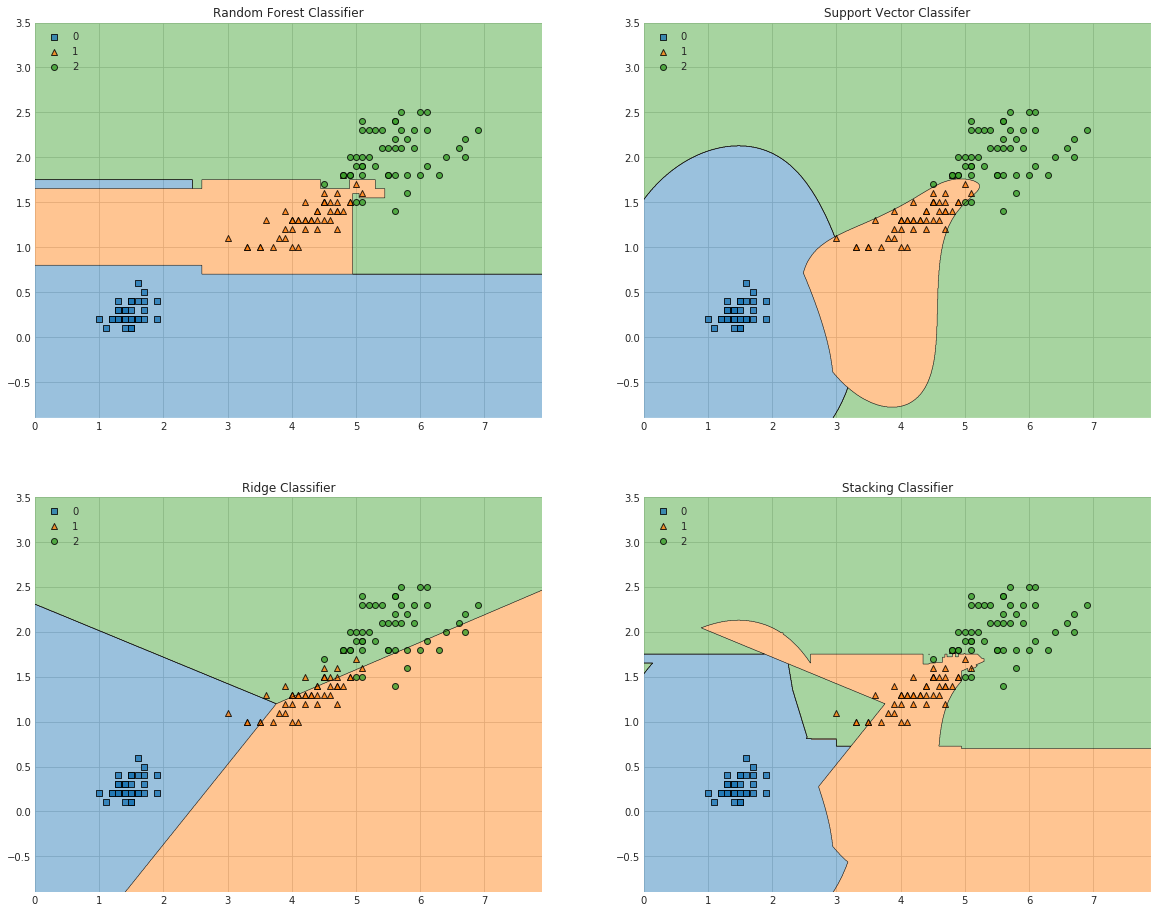

In [12]:
#Decision Regions for 4 algorithms.
X = np.array(iris_dataset[['petal_length','petal_width']])
y = np.array(y)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,16))


for clf, label, grd in zip([rf_clf, svc_clf, rg_clf, sclf], ["Random Forest Classifier", "Support Vector Classifer", "Ridge Classifier", "Stacking Classifier"], itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)

plt.show()

In [13]:
RANDOM_SEED = 0
from sklearn.naive_bayes import GaussianNB

X, y = iris_dataset.iloc[:,0:4], iris_dataset.iloc[:,4]

from sklearn.preprocessing import LabelEncoder
encoder_object = LabelEncoder()
y = encoder_object.fit_transform(y)

#Base Learners
rf_clf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEED)
et_clf = ExtraTreesClassifier(n_estimators=5, random_state=RANDOM_SEED)
knn_clf = KNeighborsClassifier(n_neighbors=2)
lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED)
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=RANDOM_SEED)
adab_clf = AdaBoostClassifier(n_estimators=100)
lr = LogisticRegression(random_state=RANDOM_SEED) # meta classifier
gnb_clf = GaussianNB()

#sclf = StackingClassifier(classifiers=[rf_clf, et_clf, knn_clf, svc_clf, rg_clf, lr_clf, dt_clf, adab_clf], use_probas=True, average_probas=False, meta_classifier=lr)
sclf = StackingClassifier(classifiers=[rf_clf, knn_clf, gnb_clf, lr_clf, et_clf, dt_clf, adab_clf], use_probas=True, average_probas=False, meta_classifier=lr)

classifier_array = [rf_clf, knn_clf, gnb_clf, lr_clf, et_clf, dt_clf, adab_clf, sclf]
labels = [clf.__class__.__name__ for clf in classifier_array]

for clf, label in zip(classifier_array, labels):
    cv_scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (cv_scores.mean(), cv_scores.std(), label))

Accuracy: 0.9538 (+/- 0.0367) [RandomForestClassifier]
Accuracy: 0.9534 (+/- 0.0087) [KNeighborsClassifier]
Accuracy: 0.9342 (+/- 0.0328) [GaussianNB]
Accuracy: 0.9542 (+/- 0.0515) [LogisticRegression]
Accuracy: 0.9408 (+/- 0.0420) [ExtraTreesClassifier]
Accuracy: 0.9473 (+/- 0.0329) [DecisionTreeClassifier]
Accuracy: 0.9600 (+/- 0.0161) [AdaBoostClassifier]
Accuracy: 0.9673 (+/- 0.0333) [StackingClassifier]


In [18]:
from sklearn.model_selection import GridSearchCV

RANDOM_SEED = 0

X, y = iris_dataset.iloc[:,0:4], iris_dataset.iloc[:,4]

from sklearn.preprocessing import LabelEncoder
encoder_object = LabelEncoder()
y = encoder_object.fit_transform(y)


#Base Learners.
rf_clf = RandomForestClassifier(random_state=RANDOM_SEED,n_jobs=-1)
knn_clf = KNeighborsClassifier(p=2, metric='minkowski',n_jobs=-1)
dt_clf = DecisionTreeClassifier(criterion='gini', random_state=RANDOM_SEED)
lr = LogisticRegression(random_state=RANDOM_SEED) # meta classifier

#sclf = StackingClassifier(classifiers=[rf_clf, et_clf, knn_clf, svc_clf, rg_clf, lr_clf, dt_clf, adab_clf], meta_classifier=lr)
sclf = StackingClassifier(classifiers=[rf_clf, knn_clf, dt_clf], meta_classifier=lr)

print("\nAccuracies of all classifiers using grid search cross validation.")

params = {'randomforestclassifier__n_estimators': np.arange(10,20), 'randomforestclassifier__max_depth': np.arange(1,5), 
          'kneighborsclassifier__n_neighbors': np.arange(1,20,2),
          'decisiontreeclassifier__max_depth': np.arange(1,5),
          'meta-logisticregression__C': [0.001,0.01,0.1,1,10,100,1000]}


gsearch_cv = GridSearchCV(estimator=sclf, param_grid=params, cv=5, refit=True)
gsearch_cv.fit(X, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

print('Best parameters: %s' % gsearch_cv.best_params_)
print('Accuracy: %.2f' % gsearch_cv.best_score_)


Accuracies of all classifiers using grid search cross validation.
Best parameters: {'decisiontreeclassifier__max_depth': 1, 'kneighborsclassifier__n_neighbors': 7, 'meta-logisticregression__C': 0.1, 'randomforestclassifier__max_depth': 3, 'randomforestclassifier__n_estimators': 15}
Accuracy: 0.98
